## Figure 1- a map of the domain


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import xarray as xr
import numpy as np
from scipy.io import loadmat
from cmocean import cm
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

import cartopy
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.patches import Rectangle
#import LambertConformalTicks as lct

%matplotlib inline

#### Cartopy - modifying BMM's excellent code!

In [3]:
## get data. 
date = '01apr16'
daten = '20160401'

phyt = xr.open_dataset\
(f'/results2/SalishSea/hindcast.201905/{date}/SalishSea_1h_{daten}_{daten}_ptrc_T.nc')
#print(phyt['diatoms'])

diat_daily = np.nanmean(phyt['diatoms'],axis = 0)

#get max and set colorbar that way
print(np.nanmax(diat_daily))


9.366245


/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


In [9]:
grid['Bathymetry'][:]

<xarray.Dataset>
Dimensions:     (x: 398, y: 898)
Dimensions without coordinates: x, y
Data variables:
    nav_lon     (y, x) float64 -123.4 -123.4 -123.4 ... -124.4 -124.3 -124.3
    nav_lat     (y, x) float64 46.86 46.86 46.86 46.87 ... 51.1 51.1 51.1 51.1
    Bathymetry  (y, x) float64 ...
Attributes:
    Conventions:  CF-1.6
    title:        Bathymetry 201702
    institution:  Dept of Earth, Ocean & Atmospheric Sciences, University of ...
    source:       https://bitbucket.org/salishsea/tools/src/tip/ProcessNewRiv...
    references:   NEMO-forcing/grid/bathymetry_201702.nc
    history:      [2017-09-30 12:34:48] Created netCDF4 zlib=True dataset.
    comment:      Bathymetry processed from Michaels New Full River Bathymetr...

/home/tjarniko/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/tjarniko/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


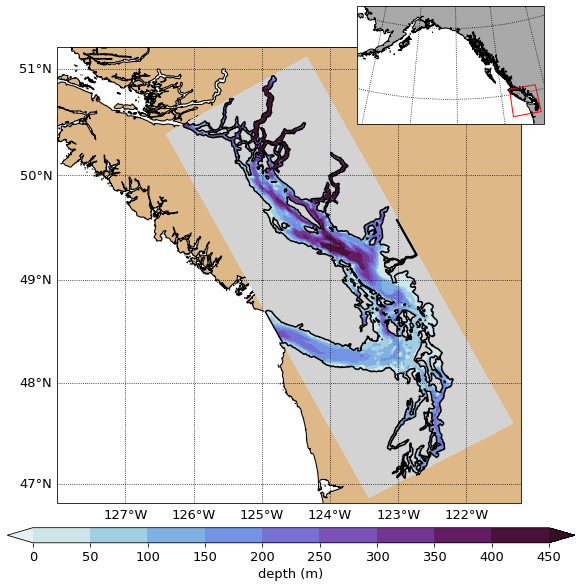

In [16]:
#rcparams
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'bold',
'size'   : 13}


grid = xr.open_dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')



tlev = np.arange(0, 500, 50)

subdomain = [114, 397, 334, 897]
fact = 1.2
fig = plt.figure(figsize=(9*fact, 7*fact))
gs = plt.GridSpec(1, 1)#, width_ratios=[1.8, 1], wspace=0.13)

# Map Left
xlim, ylim = [-128, -121.2], [46.8, 51.2]
ax = fig.add_subplot(gs[0], projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
#full
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))




c = ax.contourf(
    grid.nav_lon, grid.nav_lat, grid['Bathymetry'][:], levels=tlev,
    cmap=cm.dense, extend='both', transform=crs.PlateCarree(), zorder=2,
)
for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
    )
    
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# ax.text(0.15, 0.1, 'Pacific\nOcean', weight='bold', fontsize = 12, transform=ax.transAxes)
# ax.text(0.32, 0.307, 'Juan de Fuca', weight='bold', transform=ax.transAxes, rotation=-19.5)
# ax.text(0.555, 0.305, 'Strait', weight='bold', transform=ax.transAxes, rotation=10.5)
# ax.text(0.82, 0.18, 'Puget\nSound', weight='bold', transform=ax.transAxes)

# ax.text(0.355, 0.4851, 'Strait of Georgia', weight='bold', transform=ax.transAxes, rotation=-30, color='w')
# #ax.text(0.010, 0.755, 'Johnstone', weight='bold', transform=ax.transAxes, rotation=-20)
# ax.text(0.015, 0.740, 'Johnstone \n Strait ', weight='bold', transform=ax.transAxes, rotation=-0)
#ax.text(0.16, 0.675, 'Strait', weight='bold', transform=ax.transAxes, rotation=-60)

# ax.text(0.44, 0.38, 'Haro\nStrait', weight='bold', transform=ax.transAxes)


# ax.text(0.72, 0.55, 'Fraser\nRiver', weight='bold', transform=ax.transAxes)
# ax.text(0.35, 0.9, 'Bute Inlet', weight='bold', transform=ax.transAxes)
# ax.text(0.42, 0.80, 'Toba Inlet', weight='bold', transform=ax.transAxes)
# ax.text(0.53, 0.75, 'Jervis Inlet', weight='bold', transform=ax.transAxes)
# ax.text(0.60, 0.67, 'Howe Sound', weight='bold', transform=ax.transAxes)


#Map Inset
xmap, ymap = [-161, -122], [45, 62]
ax = fig.add_axes([0.60, 0.75, 0.24, 0.2], projection=crs.LambertConformal(np.mean(xmap), np.mean(ymap)))
ax.set_extent(xmap + ymap)
ax.add_feature(feature.GSHHSFeature('low', edgecolor='k', facecolor='darkgray'))
ax.add_patch(Rectangle(
    (xlim[0], ylim[0]), int(np.diff(xlim)), int(np.diff(ylim)),
    transform=crs.PlateCarree(), fill=False, edgecolor='r', zorder=10,
))


# ax.text(0.34, 0.5, 'Gulf of\nAlaska', transform=ax.transAxes)
# ax.text(0.77, 0.55, 'Canada', transform=ax.transAxes)
# ax.text(0.15, 0.9, 'USA', transform=ax.transAxes)



xticks, yticks = list(range(-170, -100, 10)), list(range(40, 80, 10))
ax.gridlines(linestyle=":", color='k', xlocs=xticks, ylocs=yticks)
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
fig.canvas.draw()
#lct.lambert_xticks(ax, xticks)
#lct.lambert_yticks(ax, yticks)

# Colorbar
cax = fig.add_axes([0.15, 0.06, 0.73, 0.025])
fig.colorbar(c, cax=cax, orientation='horizontal', label='depth (m)')
# fig.set_title('')
#fig.savefig('./paper_figs/MF01-domain.jpg', bbox_inches='tight', dpi = 300)



In [5]:
##box code that I can't quite figure out

# for box, color in zip([(0, -1, 0, -1), subdomain], ['k', 'w']):
#     lons, lats = [], []
#     corners = (box[2], box[0]), (box[2], box[1]), (box[3], box[1]), (box[3], box[0]), (box[2], box[0])
#     for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
#     ax.plot(lons, lats, '-', transform=crs.PlateCarree(), zorder=6, color=color)
    


In [6]:

#needs moving 

#ax.text(0.02, 0.97, '(a)', transform=ax.transAxes)
